# Wegfindung in Labyrinthen
### - Lösung - 

## Der Weg ist das Ziel

In der Aufgabe "Labyrinthgenerator" hast du einen Labyrinthgenerator entwickelt, der zufällige Labyrinthe erzeugen kann.
Diesmal hast du die Aufgabe, ein Verfahren zu implementieren, dass den Weg vom Start zum Ziel in diesen Labyrinthen findet.

### Labyrinth als Graph
Ein Labyrinth kann auch als sogenannter Graph betrachtet werden. Graphen kann man wie Netze veranschaulichen; sie haben Kanten (Linien) und Knoten (Punkte). An Knoten können sich mehrere Kanten treffen. Wenn man die freien Pfade eines Labyrinths als Kanten versteht und die potenziellen Kreuzungen und Kurven als Knoten, wird aus dem Labyrinth (in schwarz-weiß) ein Graph (in orange). Das folgende Bild veranschaulicht diese Idee:

<img src="http://caeze.bplaced.net/bwki/labyrinth1.png" alt="labyrinth_1" width="300"/>

An Graphen wird schon lange geforscht, daher gibt es eine Vielzahl an Verfahren und Algorithmen um verschiedenste Werte und Eigenschaften in einem Graphen zu bestimmen.

### Datenformat und Ablauf des Algorithmus
Deine Abgabe soll die Labyrinthe als png-Bilder einlesen können. Daraufhin soll aus dem Bild ein Graph erstellt werden, so wie in der Abbildung oben gezeigt. Ein schon länger bekanntes Verfahren zur Wegfindung in Graphen ist der Dijkstra-Algorithmus, den du in dieser Aufgabe implementieren sollst. Damit soll der Weg vom Start (rote Zelle) zum Ziel (blaue Zelle) gefunden und angezeigt werden. Wie der Dijkstra-Algorithmus funktioniert, ist weiter unten in der Aufgabe beschrieben.

Zunächst einmal geben wir einige Funktionen vor, mit denen die Labyrinthe angezeigt werden können. Diesen übergeben wir eintweder ein Labyrinth-Feld in einer Datenstruktur, die weiter unten genauer beschrieben wird, ober ein Bild, das mit dem Modul 'matplotlib' von einer Webquelle geladen wurde.

Wenn Bilder geladen werden sollen, wird von 'matplotlib.image.imread("png-Bild")' ein Array aus Arrays zurückgegeben, das als Elemente die Farbwerte pro Pixel enthält. Ein Farbwert ist ein Array mit vier Elementen: der Wert für rot, grün, blau und die Transparenz des Pixels. Alle Werte haben den Wertebereich 0 bis 1. Der Wert für die Transparenz und die genaue Datenstruktur sind für diese Aufgabe jedoch nicht so wichtig, da weiter unten eine Funktion vorgegeben ist, die den Farbwert eines Pixels zurückgibt.

Wichtig ist jedoch das Koordinatensystem der Bilder. Da es ein Array aus Arrays ist, ist die Indizierung umgekehrt, als sonst üblich (hier ein 3x2 Pixel großes Beispielbild):

<code>bild = [[pixel0, pixel1, pixel2],</code>  
<code>        [pixel3, pixel4, pixel5]]</code>

Willst du nun auf <code>pixel5</code> zugreifen, so musst du zuerst die y-Koordinate angeben, um die richtige Zeile auszuwählen, und dann die x-Koordinate, um den richtigen Pixel in dieser Zeile auszuwählen. Also ist <code>bild[1][2] == pixel5</code>. Willst du nun den Wert für blau aus <code>pixel5</code> ermitteln, so musst du auf Index 2 von <code>pixel5</code> zugreifen, z. B.: <code>bild[1][2][2] == 0.237</code>

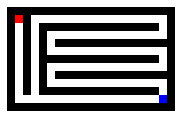

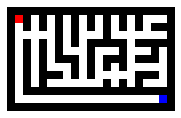

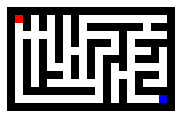

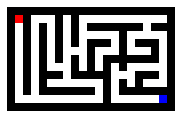

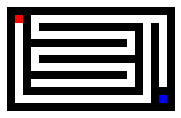

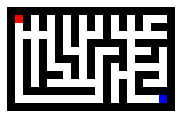

In [1]:
# importiere die nötigen Module, um Bilder von Labyrinthen anzeigen zu können
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.cm as cm
import numpy as np

# mit dieser Funktion kannst du ein Array von Arrays anzeigen,
# das benötigen wir später, um die Labyrinthe mit dem Weg anzuzeigen
def zeige_labyrinth_an(feld, breite=10, höhe=10):
    labyrinth = np.zeros([len(feld), len(feld[0]), 3])
    for x in range(len(feld)):
        for y in range(len(feld[x])):
            zelle = feld[x][y]
            # die verschiedenen Typen von Zellen werden weiter unten definiert
            if zelle.typ == 'p':
                labyrinth[x, y] = [1.0, 1.0, 1.0]
            elif zelle.typ == 'w':
                labyrinth[x, y] = [0.0, 0.0, 0.0]
            elif zelle.typ == 's':
                labyrinth[x, y] = [1.0, 0.0, 0.0]
            elif zelle.typ == 'z':
                labyrinth[x, y] = [0.0, 0.0, 1.0]
            else:
                labyrinth[x, y] = [0.6, 0.6, 0.6]
    fig = plt.figure(figsize = (breite, höhe)) 
    ax = fig.add_subplot(111)
    ax.imshow(labyrinth)
    ax.axis('off')

# mit dieser Funktion kannst du ein Bild anzeigen
def zeige_bild_an(bild, breite=10, höhe=10):
    fig = plt.figure(figsize = (breite, höhe)) 
    ax = fig.add_subplot(111)
    ax.imshow(bild, clim=(0, 1))
    ax.axis('off')

# die folgenden Labyrinthe stehen dir zum Testen zur Verfügung
einfaches_labyrinth = mpimg.imread('http://caeze.bplaced.net/bwki/easyMaze.png')
einfaches_labyrinth_2 = mpimg.imread('http://caeze.bplaced.net/bwki/easyMaze2.png')
normales_labyrinth = mpimg.imread('http://caeze.bplaced.net/bwki/normalMaze.png')
normales_labyrinth_2 = mpimg.imread('http://caeze.bplaced.net/bwki/normalMaze2.png')
unlösbares_labyrinth = mpimg.imread('http://caeze.bplaced.net/bwki/unsolvableMaze.png')
unlösbares_labyrinth_2 = mpimg.imread('http://caeze.bplaced.net/bwki/unsolvableMaze2.png')

# zeige ein Labyrinth an
zeige_bild_an(einfaches_labyrinth, 3, 3)
zeige_bild_an(einfaches_labyrinth_2, 3, 3)
zeige_bild_an(normales_labyrinth, 3, 3)
zeige_bild_an(normales_labyrinth_2, 3, 3)
zeige_bild_an(unlösbares_labyrinth, 3, 3)
zeige_bild_an(unlösbares_labyrinth_2, 3, 3)

Der Start (rote Zelle) ist in der linken oberen Ecke und das Ziel (blaue Zelle) ist in der rechten unteren Ecke.

 - Das ersten beiden Labyrinthe sind einfach lösbar, d.h. ein Weg vom Start zum Ziel ist auffindbar.
 - Die folgenden beiden Labyrinthe ist etwas komplexer, aber auch lösbar.
 - Die letzten beiden Labyrinthe sind nicht lösbar, aber haben einige Wege, die abgesucht werden können.

Im Folgenden geben wir Klassen vor, mit denen du das Labyrinth-Feld aus dem png-Bild aufbauen kannst.

In [2]:
# um die Wände und Wege im Labyrinth darzustellen, verwenden wir Objekte
# der folgenden Klassen  
class UndefinierteZelle():
    def __init__(self):
        self.typ = 'uz'
    def __str__(self):
        return self.typ

# Superklasse Zelle, von der die anderen Zellen (Wand, Pfad, Start, Ziel) erben
class Zelle():
    def __init__(self, x, y, nachbar_nord, nachbar_süd, nachbar_west, nachbar_ost):
        self.x = x
        self.y = y
        self.nachbar_nord = nachbar_nord
        self.nachbar_süd = nachbar_süd
        self.nachbar_west = nachbar_west
        self.nachbar_ost = nachbar_ost
        self.typ = 'z'
        self.entfernung_vom_startknoten = float('inf')
        self.nächste_weg_zelle = None
    def __str__(self):
        s = self.typ + ': ' + str(self.x) + '|' + str(self.y)
        if self.nachbar_nord != None:
            s += ', nord=' + self.nachbar_nord.typ
        if self.nachbar_süd != None:
            s += ', süd=' + self.nachbar_süd.typ
        if self.nachbar_west != None:
            s += ', west=' + self.nachbar_west.typ
        if self.nachbar_ost != None:
            s += ', ost=' + self.nachbar_ost.typ
        s += ', entfernung_vom_startknoten=' + str(self.entfernung_vom_startknoten)
        if self.nächste_weg_zelle != None:
            s += ', vorherige_weg_zelle=' + str(self.nächste_weg_zelle.x) + '|' + str(self.nächste_weg_zelle.y)
        return s
    def __eq__(self, other):
        if other == None:
            return False
        return self.x == other.x and self.y == other.y
    
class Pfad(Zelle):
    def __init__(self, x, y, nachbar_nord=UndefinierteZelle(), nachbar_süd=UndefinierteZelle(), nachbar_west=UndefinierteZelle(), nachbar_ost=UndefinierteZelle()):
        super().__init__(x, y, nachbar_nord, nachbar_süd, nachbar_west, nachbar_ost)
        self.typ = 'p'
    
class Wand(Zelle):
    def __init__(self, x, y, nachbar_nord=UndefinierteZelle(), nachbar_süd=UndefinierteZelle(), nachbar_west=UndefinierteZelle(), nachbar_ost=UndefinierteZelle()):
        super().__init__(x, y, nachbar_nord, nachbar_süd, nachbar_west, nachbar_ost)
        self.typ = 'w'
    
class Start(Zelle):
    def __init__(self, x, y, nachbar_nord=UndefinierteZelle(), nachbar_süd=UndefinierteZelle(), nachbar_west=UndefinierteZelle(), nachbar_ost=UndefinierteZelle()):
        super().__init__(x, y, nachbar_nord, nachbar_süd, nachbar_west, nachbar_ost)
        self.typ = 's'
    
class Ziel(Zelle):
    def __init__(self, x, y, nachbar_nord=UndefinierteZelle(), nachbar_süd=UndefinierteZelle(), nachbar_west=UndefinierteZelle(), nachbar_ost=UndefinierteZelle()):
        super().__init__(x, y, nachbar_nord, nachbar_süd, nachbar_west, nachbar_ost)
        self.typ = 'z'

### Bild zu Graph

Nun wollen wir die png-Bilder der Labyrinthe in Graphen umwandeln. Eine Funktion, die die Farbe eines Bildes an einer Pixelposition ermittelt und eine, die die Größe des Bilds bestimmt, ist vorgegeben.

In [3]:
# diese Funktion gibt die Farbe an der Position (x|y) im gegebenen Bild zurück 
def farbe_an_position(bild, x, y):
    rot = bild[y][x][0]
    grün = bild[y][x][1]
    blau = bild[y][x][2]
    rgb = (rot, grün, blau)
    if rgb == (1, 0, 0):
        return 'rot'
    if rgb == (0, 0, 1):
        return 'blau'
    if rgb == (1, 1, 1):
        return 'weiß'
    return 'schwarz'

# diese Funktion gibt die Größe (Breite x Höhe) eines Bildes zurück
def abmessungen(bild):
    return (len(bild[0]), len(bild))

# Beispielaufrufe
print(farbe_an_position(unlösbares_labyrinth, 1, 1))
print(abmessungen(unlösbares_labyrinth))

rot
(21, 13)


*Hinweis*: die Startzelle ist bei (1|1) und die Zielzelle bei (19|11).

*Beachte*: wenn du Arrays von Arrays verwendest, musst du bei der Indizierung aufpassen. Wenn die inneren Arrays die Zeilen des Labyrinth-Felds sind, so kehren sich die x- und y-Koordinate um!

Schreibe nun eine Funktion, die ein Bild einliest und ein Array von Arrays der Zellen-Objekte zurückgibt, die das Labyrinth darstellen. Wichtig dabei ist, dass du die Nachbarobjekte der Zellen korrekt setzt!

p: 5|5, nord=p, süd=p, west=w, ost=w, entfernung_vom_startknoten=inf


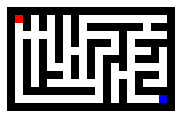

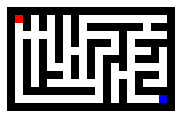

In [4]:
# In dieser Funktion wird das Bild des Labyrinths in eine Datenstruktur
# umgewandelt, mit der es einfacher ist, weiterzuarbeiten.
# Schreibe die korrekten Zellen-Objekte an die richtge Stelle des
# zweidimensionalen Arrays 'feld', welches du dann zurückgibst.
def bild_zu_labyrinth_feld(bild):
    breite, höhe = abmessungen(bild)
    feld = []
    for y in range(höhe):
        zeile = []
        for x in range(breite):
            if farbe_an_position(bild, x, y) == 'weiß':
                zeile.append(Pfad(x, y))
            if farbe_an_position(bild, x, y) == 'schwarz':
                zeile.append(Wand(x, y))
            if farbe_an_position(bild, x, y) == 'rot':
                zeile.append(Start(x, y))
            if farbe_an_position(bild, x, y) == 'blau':
                zeile.append(Ziel(x, y))
        feld.append(zeile)
    
    def hole_zelle_oder_none(feld, x, y):
        if x < 0 or y < 0 or y >= len(feld) or x >= len(feld[y]):
            return None
        return feld[y][x]
    
    def hole_nachbar(feld, x, y, richtung):
        if richtung == 'nord':
            return hole_zelle_oder_none(feld, x, y - 1)
        if richtung == 'süd':
            return hole_zelle_oder_none(feld, x, y + 1)
        if richtung == 'west':
            return hole_zelle_oder_none(feld, x - 1, y)
        if richtung == 'ost':
            return hole_zelle_oder_none(feld, x + 1, y)
    
    for y in range(höhe):
        for x in range(breite):
            feld[y][x].nachbar_nord = hole_nachbar(feld, x, y, 'nord')
            feld[y][x].nachbar_süd = hole_nachbar(feld, x, y, 'süd')
            feld[y][x].nachbar_west = hole_nachbar(feld, x, y, 'west')
            feld[y][x].nachbar_ost = hole_nachbar(feld, x, y, 'ost')
    
    return feld

# das zu testende Labyrinth
labyrinth = normales_labyrinth

# erstelle die Datenstruktur aus dem Bild
feld = bild_zu_labyrinth_feld(labyrinth)

# gib die Informationen einer Zelle testweise aus
print(feld[5][5])

# teste deine Funktion, ob die beiden Bilder identisch sind
zeige_bild_an(labyrinth, 3, 3)
zeige_labyrinth_an(feld, 3, 3)

Nun wollen wir den Dijkstra-Algorithmus implementieren. Dazu benötigen wir nur noch die Pfad-, Start- und Zielzellen, die Wände sind nicht Teil des Graphen und werden ignoriert.

Der Dijkstra-Algorithmus sucht den kürzesten Weg (den Pfad mit den geringsten Kosten) von einem Startknoten zu einem Zielknoten oder allen anderen Knoten in einem Graphen. Der Algorithmus gehört zu den Greedy-Algorithmen.
Weitere Informationen findest du z. B. hier: https://de.wikipedia.org/wiki/Dijkstra-Algorithmus.

Der Dijkstra-Algorithmus funktioniert folgendermaßen:

<code>1. setze die Entfernung von der Startzelle zur Startzelle auf 0 (in 'Zelle.entfernung_vom_startknoten')</code>  
<code>2. setze die Entfernung von allen anderen Zellen zur Startzelle auf unendlich (ist bereits so initialisiert)</code>  
<code>3. initialisiere eine Liste, die eine Warteschlange darstellt</code>  
<code>4. schreibe in die Warteschlange alle Zellen, die Teil des Graphen sind (Wege-, Start- und Zielzellen)</code>  
<code>5. WHILE die Warteschlange ist nicht leer:</code>  
<code>    5.1 wähle aus der Warteschlange diejenige Zelle beste_zelle, deren Entfernung zur Startzelle am kleinsten ist</code>  
<code>    5.2 entferne diese Zelle beste_zelle aus der Warteschlange</code>  
<code>    5.3 FOR Nachbar n aus allen Nachbarn der Zelle beste_zelle im Graphen:</code>  
<code>        5.3.1 setze die alternative Weglänge aw = Entfernung zur Startzelle von beste_zelle + Kantenlänge</code>  
<code>        5.3.2 WENN aw kleiner ist als die Entfernung zur Startzelle von n:</code>  
<code>            5.3.2.1 setze die Entfernung zur Startzelle von n = aw</code>  
<code>            5.3.2.2 speichere beste_zelle als nächste Wegzelle von n (in 'Zelle.nächste_weg_zelle')</code>  

Diesen Pseudocode sollst du im nächsten Codeblock implementieren.

Von der Funktion 'dijkstra' soll nichts zurückgegeben werden, sondern es sollen die Änderungen an den Zellen-Objekten direkt im übergebenen Labyrinth-Feld vorgenommen werden.

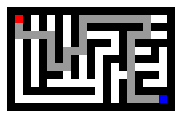

In [5]:
# da bei dieser Aufgabe die Pixel des Labyrinths immer nebeneinander liegen,
# ist die Kantenlänge zwischen zwei Knoten im Graph immer 1
kantenlänge = 1

# diese Funktion gibt diejenige Zelle zurück, die den kleinsten Wert
# von 'entfernung_vom_startknoten' in der Warteschlange hat
def hole_zelle_mit_kürzester_entfernung_vom_startknoten(warteschlange):
    zelle = None
    for i in range(len(warteschlange)):
        if warteschlange[i].typ == 'p' or warteschlange[i].typ == 's' or warteschlange[i].typ == 'z':
            if zelle == None:
                zelle = warteschlange[i]
            elif zelle != None and warteschlange[i].entfernung_vom_startknoten < zelle.entfernung_vom_startknoten:
                zelle = warteschlange[i]
    return zelle

# diese Funktion gibt die Nachbarpfad-, Nachbarstart- und Nachbarzielzellen
# der gegebenen zelle zurück, jedoch niemals Wände oder nichtvorhandene
# Zellen außerhalb des Felds!
def hole_nachbarn(feld, zelle):
    nachbarn = []
    for n in [zelle.nachbar_nord, zelle.nachbar_süd, zelle.nachbar_west, zelle.nachbar_ost]:
        if n != None and (n.typ == 'p' or n.typ == 's' or n.typ == 'z'):
            nachbarn.append(n)
    return nachbarn

# der Djikstra-Algorithmus soll hier implementiert werden
def dijkstra(feld, start):
    start.entfernung_vom_startknoten = 0
    
    warteschlange = []
    for y in range(len(feld)):
        for x in range(len(feld[y])):
            if feld[y][x].typ == 'p' or feld[y][x].typ == 's' or feld[y][x].typ == 'z':
                warteschlange.append(feld[y][x])
    
    while(len(warteschlange) > 0):
        bz = hole_zelle_mit_kürzester_entfernung_vom_startknoten(warteschlange)
        warteschlange.remove(bz)
        for n in hole_nachbarn(feld, bz):
            aw = bz.entfernung_vom_startknoten + kantenlänge
            if aw < n.entfernung_vom_startknoten:
                n.entfernung_vom_startknoten = aw
                n.nächste_weg_zelle = bz

# wähle das zu testende Labyrinth aus
# bei unlösbaren Labyrinthen soll nach erfolgloser Suche einfach nichts geschehen
labyrinth = normales_labyrinth
#labyrinth = normales_labyrinth_2
#labyrinth = einfaches_labyrinth
#labyrinth = einfaches_labyrinth_2
#labyrinth = unlösbares_labyrinth
#labyrinth = unlösbares_labyrinth_2

# lade das Feld jedes Mal neu, weil es in der Funktion 'dijkstra' verändert wird
feld = bild_zu_labyrinth_feld(labyrinth)
start = feld[1][1]
ziel = feld[11][19]

# führe den Dijkstra-Algorithmus aus
dijkstra(feld, start)

# laufe von der Ziel- zur Startzelle und markiere den gefundenen Weg
n = ziel
while n != None:
    n = n.nächste_weg_zelle
    if n != None and n != start:
        n.typ = 'weg'

# zeige den Weg an
zeige_labyrinth_an(feld, 3, 3)

## Fragen & Feedback:

**Wenn ihr Fragen oder Anregungen zu der Aufgabe (oder Lösung) habt, dann tauscht euch gerne im [Chat](https://spectrum.chat/bwki/aufgabenarchiv/) darüber aus oder schreibt uns eine E-Mail (an info@bw-ki.de).**

Wir freuen uns auch immer über **Feedback** (auch unter info@bw-ki.de):

- War diese Aufgabe zu leicht, zu schwer oder genau richtig?
- Wie lang hast du für diese Aufgabe ungefähr gebraucht?
- Welche Art von Aufgaben wünschst du dir in Zukunft?